# Modeling Pipelines

### This notebook is a rough draft of all of my potential linear models. This is pretty much scratch work, but there are graphs of the residuals and scores for each model used. These are not finetuned. Please refer to notebook 2.4 for my performance model.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR


In [6]:
# Make sure we are in the right directory for reading in the data!!!
!pwd

/Users/alexander.fioto/dsir-824/submissions/projects/project-2-master


In [7]:
# Reading in feature enhanced data
training = pd.read_csv('./datasets/training_enhanced.csv')
test = pd.read_csv('./datasets/test_enhanced.csv')

In [8]:
# Features to use.
features = [#'all_sf',
            'overall_qual',  
            'exter_qual',
            'all_flr_sf', 
            #'gr_liv_area',
            'neighborhood',
            'kitchen_qual',
            #'garage_cars',
            'total_bsmt_sf', 
            #'1st_flr_sf',
            'garage_area',
            #'total_bath', 
            'year_built',
            'year_remod/add',
            'full_bath',
            #'totrms_abvgrd',
            'mas_vnr_area',
            'fireplaces', 
            'heating_qc',
            'bsmtfin_sf_1',
            #'open_porch_sf',
            'lot_area',
            'lot_frontage',
            #'central_air'
]

In [9]:
X = training[features]
y = training['saleprice']
test = test[features]
(X.shape[1], test.shape[1])

(16, 16)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Linear Regression Pipeline and Gridsearch

In [11]:
lr_pipe = make_pipeline(StandardScaler(), 
                        PolynomialFeatures(), 
                        RFE(LinearRegression()), 
                        LinearRegression())


In [12]:
lr_params = {
    'rfe__n_features_to_select': range(1, 50),
    'linearregression__fit_intercept': [True, False],
          }

In [13]:
lr_gs = GridSearchCV(lr_pipe, lr_params, n_jobs=-1)

In [14]:
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('rfe',
                                        RFE(estimator=LinearRegression())),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'rfe__n_features_to_select': range(1, 50)})

Linear Regression Test Score 0.9089638035345202
Linear Regression RMSE Test 24533.79704353026
Linear Regression Training Score 0.9338187449492685
Linear Regression RMSE Training 19347.158566933256


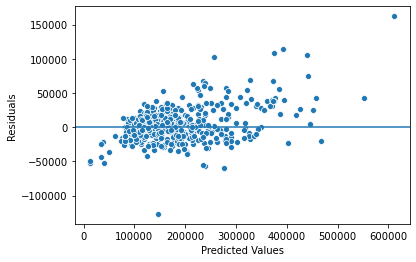

In [15]:
# Scoring the model

print('Linear Regression Test Score', lr_gs.score(X_test, y_test))
print('Linear Regression RMSE Test', mean_squared_error(y_test, lr_gs.predict(X_test), squared=False))
print('Linear Regression Training Score', lr_gs.score(X_train, y_train))
print('Linear Regression RMSE Training', mean_squared_error(y_train, lr_gs.predict(X_train), squared=False))

preds = lr_gs.predict(X_test)
lr_resids = np.array(y_test) - preds
sns.scatterplot(x=y_test, y=lr_resids)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

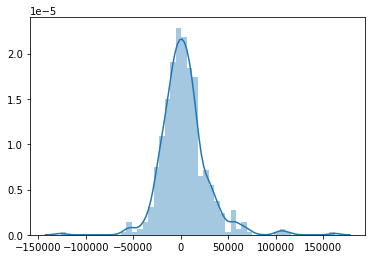

In [16]:
sns.distplot(lr_resids);

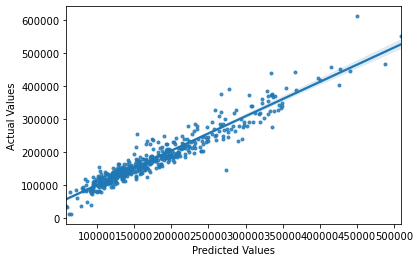

In [17]:
sns.regplot(x=preds, y=y_test, marker='.')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [18]:
# Calculating best parameters
lr_gs.best_params_

{'linearregression__fit_intercept': True, 'rfe__n_features_to_select': 43}

In [20]:
# Creating predictions CSV
test_preds = lr_gs.predict(test)
test1 = pd.read_csv('./datasets/test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [3300]:
#Exporting predictions CSV
#submission.to_csv('./datasets/1_lr_submission.csv')

## Ridge Regression Pipeline and Gridsearch

In [3439]:
ridge_pipe = make_pipeline(
    StandardScaler(), 
    PolynomialFeatures(), 
    SelectKBest(), 
    Ridge())


In [3440]:
ridge_params = {
    'selectkbest__k': range(100, 200),
    'ridge__fit_intercept': [True, False],
    'ridge__alpha': range(50, 200, 10)
          }

In [3441]:
ridge_gs = GridSearchCV(ridge_pipe, ridge_params, n_jobs=-1)

In [3442]:
ridge_gs.fit(X_train, y_train)

/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [0] are constant.
  UserWarning)
/Users/alexander.fioto/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest', SelectKBest()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': range(50, 200, 10),
                         'ridge__fit_intercept': [True, False],
                         'selectkbest__k': range(100, 200)})

Ridge Test Score 0.9275179456899433
Ridge RMSE Test 21388.375985312105
Ridge Training Score 0.930779411062445
Ridge RMSE Training 19962.412206217818


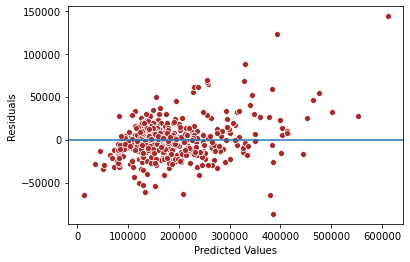

In [3443]:
# Scoring the model

print('Ridge Test Score', ridge_gs.score(X_test, y_test))
print('Ridge RMSE Test', mean_squared_error(y_test, ridge_gs.predict(X_test), squared=False))
print('Ridge Training Score', ridge_gs.score(X_train, y_train))
print('Ridge RMSE Training', mean_squared_error(y_train, ridge_gs.predict(X_train), squared=False))

preds = ridge_gs.predict(X_test)
ridge_resids = np.array(y_test) - preds
sns.scatterplot(x=y_test, y=ridge_resids, color='brown')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

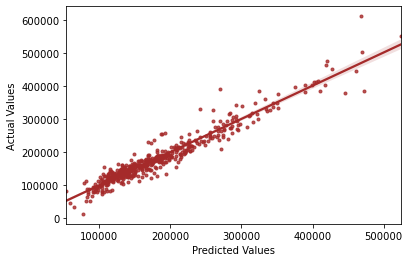

In [3444]:
sns.regplot(x=preds, y=y_test, marker='.', color='brown')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [3445]:
# Calculating best parameters
ridge_gs.best_params_

{'ridge__alpha': 110, 'ridge__fit_intercept': True, 'selectkbest__k': 150}

In [3430]:
# Creating predictions CSV
test_preds = ridge_gs.predict(test)
test1 = pd.read_csv('./test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [3446]:
#Exporting predictions CSV
submission.to_csv('./7_ridge_submission.csv')

## Lasso Regression Pipeline and Gridsearch

In [3406]:
lasso_pipe = make_pipeline(StandardScaler(), 
                           PolynomialFeatures(),
                           Lasso())


In [3407]:
lasso_params = {
    'lasso__fit_intercept': [True, False],
    'lasso__alpha': [.01, 1, 10, 100]
          }

In [3408]:
lasso_gs = GridSearchCV(lasso_pipe, lasso_params, n_jobs=-1)

In [3409]:
lasso_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': [0.01, 1, 10, 100],
                         'lasso__fit_intercept': [True, False]})

Lasso Test Score 0.9198845932081545
Lasso RMSE Test 21403.974721757815
Lasso Training Score 0.9357496225232314
Lasso RMSE Training 19561.042459983066


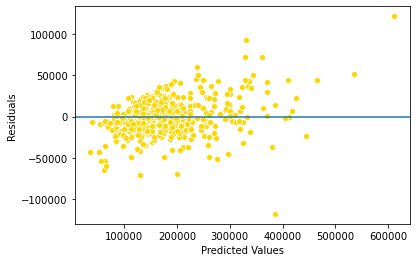

In [3410]:
# Scoring the model

print('Lasso Test Score', lasso_gs.score(X_test, y_test))
print('Lasso RMSE Test', mean_squared_error(y_test, lasso_gs.predict(X_test), squared=False))
print('Lasso Training Score', lasso_gs.score(X_train, y_train))
print('Lasso RMSE Training', mean_squared_error(y_train, lasso_gs.predict(X_train), squared=False))

preds = lasso_gs.predict(X_test)
resids = np.array(y_test) - preds
sns.scatterplot(x=y_test, y=resids, color='gold')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

In [3411]:
# Calculating best parameters
lasso_gs.best_params_

{'lasso__alpha': 100, 'lasso__fit_intercept': True}

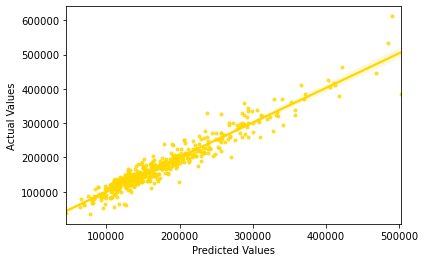

In [3412]:
sns.regplot(x=preds, y=y_test, marker='.', color='gold')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [3413]:
# Creating predictions CSV
test_preds = lasso_gs.predict(test)
test1 = pd.read_csv('./test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [3414]:
#Exporting predictions CSV
#submission.to_csv('./2_lasso_submission.csv')

## ElasticNet Pipeline and Gridsearch

In [3397]:
enet_pipe = make_pipeline(StandardScaler(), 
                          PolynomialFeatures(), 
                          ElasticNet(max_iter=2000))


In [3398]:
enet_params = {
    'elasticnet__alpha': range(100, 200),
    'elasticnet__l1_ratio': [.9, .95, .98, 1],
    'elasticnet__fit_intercept': [True, False]
          }

In [3399]:
enet_gs = GridSearchCV(enet_pipe, enet_params, n_jobs=-1)

In [3400]:
enet_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'elasticnet__alpha': range(100, 200),
                         'elasticnet__fit_intercept': [True, False],
                         'elasticnet__l1_ratio': [0.9, 0.95, 0.98, 1]})

ElasticNet Test Score 0.9210590045102616
ElasticNet RMSE Test 21246.515168555707
ElasticNet Training Score 0.9339868905120938
ElasticNet RMSE Training 19827.558921933392


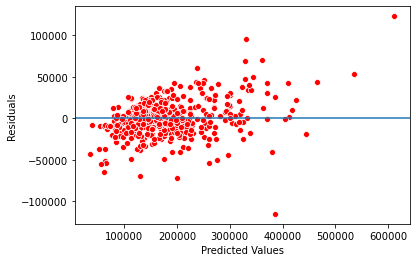

In [3401]:
# Scoring the model

print('ElasticNet Test Score', enet_gs.score(X_test, y_test))
print('ElasticNet RMSE Test', mean_squared_error(y_test, enet_gs.predict(X_test), squared=False))
print('ElasticNet Training Score', enet_gs.score(X_train, y_train))
print('ElasticNet RMSE Training', mean_squared_error(y_train, enet_gs.predict(X_train), squared=False))

preds = enet_gs.predict(X_test)
resids = np.array(y_test) - preds
sns.scatterplot(x=y_test, y=resids, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

In [3402]:
# Calculating best parameters
enet_gs.best_params_

{'elasticnet__alpha': 199,
 'elasticnet__fit_intercept': True,
 'elasticnet__l1_ratio': 1}

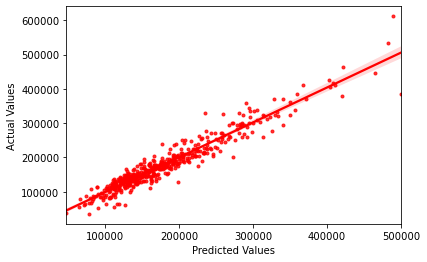

In [3403]:
sns.regplot(x=preds, y=y_test, marker='.', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [3404]:
# Creating predictions CSV
test_preds = enet_gs.predict(test)
test1 = pd.read_csv('./test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [3405]:
#Exporting predictions CSV
submission.to_csv('./5_enet_submission.csv')

## Support Vector Regression Pipeline and Gridsearch

In [3127]:
svr_pipe = make_pipeline(StandardScaler(), 
                        PolynomialFeatures(), 
                        RFE(LinearRegression()), 
                        SVR())


In [ ]:
svr_params = {
    'rfe__n_features_to_select':range(100, 200, 10),
    'svr__C': range(100, 200, 10),
    'svr__kernel': ['rbf', 'poly', 'linear']
          }

In [ ]:
svr_gs = GridSearchCV(svr_pipe, svr_params, n_jobs=-1)

In [ ]:
#svr_gs.fit(X_train, y_train)

In [ ]:
# Scoring the model

print('SVR Test Score', svr_gs.score(X_test, y_test))
print('SVR RMSE Test', mean_squared_error(y_test, svr_gs.predict(X_test), squared=False))
print('SVR Training Score', svr_gs.score(X_train, y_train))
print('SVR RMSE Training', mean_squared_error(y_train, svr_gs.predict(X_train), squared=False))

preds = svr_gs.predict(X_test)
resids = np.array(y_test) - preds
sns.scatterplot(x=y_test, y=resids, color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline();

In [ ]:
sns.regplot(x=preds, y=y_test, marker='.', color='green')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values');

In [ ]:
# Calculating best parameters
svr_gs.best_params_

In [ ]:
# Creating predictions CSV
test_preds = svr_gs.predict(test)
test1 = pd.read_csv('./test.csv')
submission= pd.DataFrame(test_preds, index=test1['Id'])
submission.columns = ['saleprice']

In [ ]:
#Exporting predictions CSV
#submission.to_csv('./datasets/1_svr_submission.csv')